In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


def loadResult(filePath):
    return pd.read_csv(filePath,
                        header=None,
                        skiprows=1,
                        names=['IdScenary','TotalRepeats','TotalFolds','ExecutionNumber','CurrentRepeatNumber', 'CurrentFoldNumber',
                               'DatabaseName','DistanceMethod','ElipsedTrainingTime','ElipsedPredict1Time','ElipsedPredict2Time',
                               'ErrorPredict1', 'ErrorPredict2'
                               ])


#creating an empty dataframe
dfResults = pd.DataFrame(columns=['IdScenary','TotalRepeats','TotalFolds','ExecutionNumber','CurrentRepeatNumber', 'CurrentFoldNumber',
                               'DatabaseName','DistanceMethod','ElipsedTrainingTime','ElipsedPredict1Time','ElipsedPredict2Time',
                               'ErrorPredict1', 'ErrorPredict2'
                               ])

#appending results
dfResults = pd.concat([dfResults, loadResult('~/saida_full.txt')], ignore_index=True)
#dfResults = pd.concat([dfResults, loadResult('~/saida2.txt')], ignore_index=True)

#creating categorical to be possible sort dataframe by the amount of observations
dfResults['DatabaseName'] = pd.Categorical(dfResults['DatabaseName'], ["Iris","Sonar","GlassIdentification","LibrasMovement","Bands","ElectricalFaultClassification","ElectricalGridStability","ElectricalFaultDetection"])


#replacing distanceMethod values
replaceDict = {1: "Serial", 3: "CPU Multiprocessing", 4: "GPU"}
dfResults['DistanceMethod'] = dfResults['DistanceMethod'].map(replaceDict)

#creating categorical to be possible sort dataframe by distanceMethod
dfResults['DistanceMethod'] = pd.Categorical(dfResults['DistanceMethod'], ["Serial","CPU Multiprocessing","GPU"])

#creating accuracy columns
dfResults["AccuracyPredict1"] = (1 - dfResults["ErrorPredict1"])*100
dfResults["AccuracyPredict2"] = (1 - dfResults["ErrorPredict2"])*100

#sorting by desired values
dfResults = dfResults.sort_values(by=['DatabaseName', 'DistanceMethod'])

dfResults

,IdScenary,TotalRepeats,TotalFolds,ExecutionNumber,CurrentRepeatNumber,CurrentFoldNumber,DatabaseName,DistanceMethod,ElipsedTrainingTime,ElipsedPredict1Time,ElipsedPredict2Time,ErrorPredict1,ErrorPredict2,AccuracyPredict1,AccuracyPredict2
0,0,30,150,0,0,0,Iris,Serial,0.061901,0.028132,0.000223,0.000000,0.000000,100.000000,100.000000
1,0,30,150,1,0,1,Iris,Serial,0.023278,0.000199,0.000065,0.000000,0.000000,100.000000,100.000000
2,0,30,150,2,0,2,Iris,Serial,0.017507,0.000189,0.000065,0.000000,0.000000,100.000000,100.000000
3,0,30,150,3,0,3,Iris,Serial,0.018549,0.000198,0.000065,0.000000,0.000000,100.000000,100.000000
4,0,30,150,4,0,4,Iris,Serial,0.012851,0.000187,0.000063,0.000000,0.000000,100.000000,100.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117625,17,30,10,295,29,5,ElectricalFaultDetection,GPU,7.990024,0.001865,0.467517,0.009167,0.008333,99.083333,99.166667
117626,17,30,10,296,29,6,ElectricalFaultDetection,GPU,8.951528,0.002022,0.488452,0.007500,0.009167,99.250000,99.083333
117627,17,30,10,297,29,7,ElectricalFaultDetection,GPU,7.411022,0.001066,0.448344,0.005833,0.001667,99.416667,99.833333
117628,17,30,10,298,29,8,ElectricalFaultDetection,GPU,8.271936,0.001107,0.451627,0.006667,0.004167,99.333333,99.583333


In [2]:
dfStatistics = dfResults.describe()

dfStatistics

,ElipsedTrainingTime,ElipsedPredict1Time,ElipsedPredict2Time,ErrorPredict1,ErrorPredict2,AccuracyPredict1,AccuracyPredict2
count,119430.000000,119430.000000,119430.000000,119430.000000,119430.000000,119430.000000,119430.000000
mean,9.915689,0.000513,0.099107,0.219689,0.218031,78.031146,78.196862
std,97.146569,0.001380,0.940412,0.411013,0.410117,41.101255,41.011743
min,0.003286,0.000170,0.000059,0.000000,0.000000,0.000000,0.000000
25%,0.207721,0.000272,0.000332,0.000000,0.000000,100.000000,100.000000
50%,0.975450,0.000343,0.001065,0.000000,0.000000,100.000000,100.000000
75%,1.312068,0.000546,0.002100,0.000000,0.000000,100.000000,100.000000
max,1305.788536,0.028132,12.268618,1.000000,1.000000,100.000000,100.000000


In [3]:
groupedByDatabaseDistanceRepead = dfResults.groupby(
                                ['DatabaseName','DistanceMethod', 'CurrentRepeatNumber']
                              ).agg(
                                     ElipsedTimeTraining=('ElipsedTrainingTime','sum'),
                                     ElipsedTimePredict1=('ElipsedPredict1Time','sum'),
                                     ElipsedTimePredict2=('ElipsedPredict2Time','sum'),
                                     AccuracyPredict1=('AccuracyPredict1','mean'),
                                     AccuracyPredict2=('AccuracyPredict2','mean')
                                    )

groupedByDatabaseDistanceRepead

ElipsedTimeTraining  \
DatabaseName             DistanceMethod CurrentRepeatNumber                        
Iris                     Serial         0                               2.221694   
                                        1                               2.102929   
                                        2                               2.105752   
                                        3                               1.987068   
                                        4                               2.060468   
...                                                                          ...   
ElectricalFaultDetection GPU            25                             76.009443   
                                        26                             74.437435   
                                        27                             79.367987   
                                        28                             72.036594   
                                        29                             79.980493   

                                                             ElipsedTimePredict1  \
DatabaseName             DistanceMethod CurrentRepeatNumber                        
Iris                     Serial         0                               0.056663   
                                        1                               0.028410   
                                        2                               0.028061   
                                        3                               0.027620   
                                        4                               0.027856   
...                                                                          ...   
ElectricalFaultDetection GPU            25                              0.010818   
                                        26                              0.011729   
                                        27                              0.010843   
                                        28                              0.010900   
                                        29                              0.013259   

                                                             ElipsedTimePredict2  \
DatabaseName             DistanceMethod CurrentRepeatNumber                        
Iris                     Serial         0                               0.025745   
                                        1                               0.024068   
                                        2                               0.024786   
                                        3                               0.023279   
                                        4                               0.023907   
...                                                                          ...   
ElectricalFaultDetection GPU            25                              4.255795   
                                        26                              4.197666   
                                        27                              4.365717   
                                        28                              4.045611   
                                        29                              4.441010   

                                                             AccuracyPredict1  \
DatabaseName             DistanceMethod CurrentRepeatNumber                     
Iris                     Serial         0                           94.000000   
                                        1                           93.333333   
                                        2                           94.000000   
                                        3                           96.000000   
                                        4                           94.000000   
...                                                                       ...   
ElectricalFaultDetection GPU            25                          99.141694   
                                        26           

In [4]:
sumarizedByDatabaseDistanceRepeat = groupedByDatabaseDistanceRepead.reset_index()

sumarizedByDatabaseDistanceRepeat

,DatabaseName,DistanceMethod,CurrentRepeatNumber,ElipsedTimeTraining,ElipsedTimePredict1,ElipsedTimePredict2,AccuracyPredict1,AccuracyPredict2
0,Iris,Serial,0,2.221694,0.056663,0.025745,94.000000,93.333333
1,Iris,Serial,1,2.102929,0.028410,0.024068,93.333333,96.000000
2,Iris,Serial,2,2.105752,0.028061,0.024786,94.000000,94.666667
3,Iris,Serial,3,1.987068,0.027620,0.023279,96.000000,96.000000
4,Iris,Serial,4,2.060468,0.027856,0.023907,94.000000,92.666667
...,...,...,...,...,...,...,...,...
715,ElectricalFaultDetection,GPU,25,76.009443,0.010818,4.255795,99.141694,99.300028
716,ElectricalFaultDetection,GPU,26,74.437435,0.011729,4.197666,99.216750,99.425042
717,ElectricalFaultDetection,GPU,27,79.367987,0.010843,4.365717,99.325056,99.416729
718,ElectricalFaultDetection,GPU,28,72.036594,0.010900,4.045611,99.225132,99.408417


Iris - Serial
Iris - CPU Multiprocessing
Iris - GPU
Sonar - Serial
Sonar - CPU Multiprocessing
Sonar - GPU
GlassIdentification - Serial
GlassIdentification - CPU Multiprocessing
GlassIdentification - GPU
LibrasMovement - Serial
LibrasMovement - CPU Multiprocessing
LibrasMovement - GPU
Bands - Serial
Bands - CPU Multiprocessing
Bands - GPU
ElectricalFaultClassification - Serial
ElectricalFaultClassification - CPU Multiprocessing
ElectricalFaultClassification - GPU
ElectricalGridStability - Serial
ElectricalGridStability - CPU Multiprocessing
ElectricalGridStability - GPU
ElectricalFaultDetection - Serial
ElectricalFaultDetection - CPU Multiprocessing
ElectricalFaultDetection - GPU


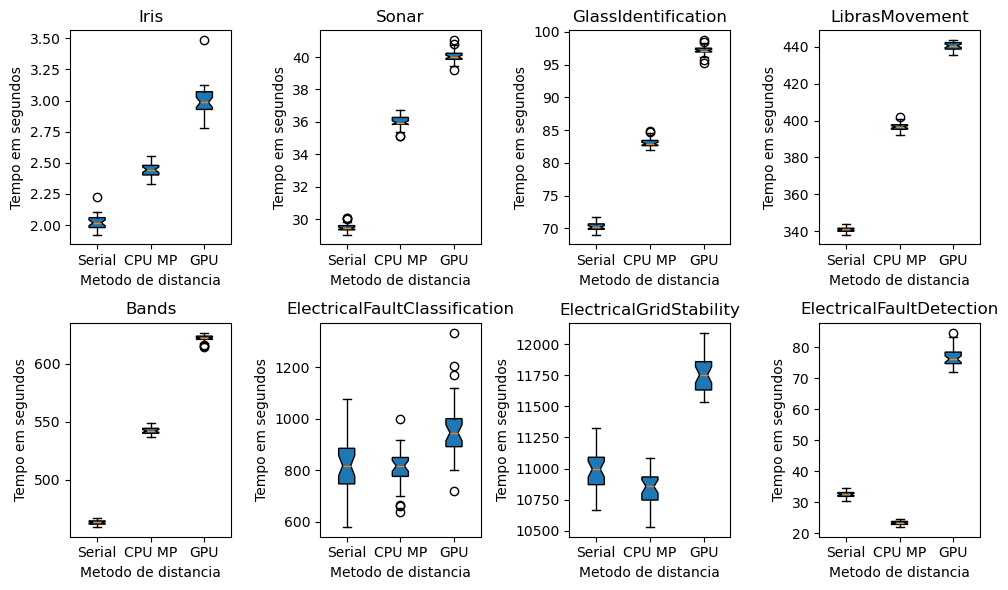

In [5]:
#create boxplot charts

fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(10, 6))  # 2x2 grid

databases = sumarizedByDatabaseDistanceRepeat['DatabaseName'].unique()

countDatabase = 0
for database in databases:
    dfTime = sumarizedByDatabaseDistanceRepeat[sumarizedByDatabaseDistanceRepeat['DatabaseName'] == database][['DatabaseName','DistanceMethod','ElipsedTimeTraining']]
    distanceMethods = dfTime['DistanceMethod'].unique()
    dfResults = pd.DataFrame()
    for distanceMethod in distanceMethods:
        print(database + " - " + distanceMethod)
        tmpSerie = dfTime[dfTime['DistanceMethod'] == distanceMethod]['ElipsedTimeTraining']
        tmpSerie.reset_index(drop=True, inplace=True)
        dfResults[distanceMethod] = tmpSerie

    # Creating plot
    axes[countDatabase//4, countDatabase%4].boxplot(dfResults, vert=True, patch_artist=True, notch=True)
    axes[countDatabase//4, countDatabase%4].set_title(database)
    axes[countDatabase//4, countDatabase%4].set_xlabel('Metodo de distancia')
    axes[countDatabase//4, countDatabase%4].set_ylabel('Tempo em segundos')
    axes[countDatabase//4, countDatabase%4].set_xticks([1,2,3])  # Define a posição do rótulo no eixo x
    axes[countDatabase//4, countDatabase%4].set_xticklabels(['Serial',"CPU MP",'GPU'])  # Define o rótulo

    countDatabase = countDatabase + 1

# show plot
plt.tight_layout()
plt.show()

In [6]:
#create table with all data sumarized

sumarizedGroup = sumarizedByDatabaseDistanceRepeat.groupby(
                                ['DatabaseName','DistanceMethod']
                                ).agg({
    'ElipsedTimeTraining': [('Mean', 'mean'),('Std', 'std')],  # Subcolunas dentro de 'Valor1'
    'ElipsedTimePredict1': [('Mean', 'mean'),('Std', 'std')],  # Subcolunas dentro de 'Valor1'
    'ElipsedTimePredict2': [('Mean', 'mean'),('Std', 'std')],  # Subcolunas dentro de 'Valor1'
    'AccuracyPredict1': [('Acuracia', 'mean'), ('Std', 'std')],  # Subcolunas dentro de 'Valor2'
    'AccuracyPredict2': [('Acuracia', 'mean'), ('Std', 'std')]  # Subcolunas dentro de 'Valor2'
     }).rename(columns={'ElipsedTimeTraining': 'Tempo Treinamento',
                   'ElipsedTimePredict1': 'Tempo Predict1',
                   'ElipsedTimePredict2': 'Tempo Predict2',
                   'AccuracyPredict1': 'Acuracia1',
                   'AccuracyPredict2': 'Acuracia2'
                   })

sumarizedGroup[('Tempo Treinamento', 'Mean')] = sumarizedGroup[('Tempo Treinamento', 'Mean')].map(lambda x: f"{x:.2f}")
sumarizedGroup[('Tempo Treinamento', 'Std')] = sumarizedGroup[('Tempo Treinamento', 'Std')].map(lambda x: f"{x:.2f}")
sumarizedGroup[('Tempo Predict1', 'Mean')] = sumarizedGroup[('Tempo Predict1', 'Mean')].map(lambda x: f"{x:.4f}")
sumarizedGroup[('Tempo Predict2', 'Mean')] = sumarizedGroup[('Tempo Predict2', 'Mean')].map(lambda x: f"{x:.4f}")
sumarizedGroup[('Acuracia1', 'Acuracia')] = sumarizedGroup[('Acuracia1', 'Acuracia')].map(lambda x: f"{x:.2f}")
sumarizedGroup[('Acuracia1', 'Std')] = sumarizedGroup[('Acuracia1', 'Std')].map(lambda x: f"{x:.2f}")
sumarizedGroup[('Acuracia2', 'Acuracia')] = sumarizedGroup[('Acuracia2', 'Acuracia')].map(lambda x: f"{x:.2f}")
sumarizedGroup[('Acuracia2', 'Std')] = sumarizedGroup[('Acuracia2', 'Std')].map(lambda x: f"{x:.2f}")


sumarizedGroup



Tempo Treinamento          \
                                                               Mean     Std   
DatabaseName                  DistanceMethod                                  
Iris                          Serial                           2.03    0.06   
                              CPU Multiprocessing              2.44    0.06   
                              GPU                              3.00    0.13   
Sonar                         Serial                          29.47    0.28   
                              CPU Multiprocessing             36.02    0.39   
                              GPU                             40.04    0.40   
GlassIdentification           Serial                          70.27    0.65   
                              CPU Multiprocessing             83.12    0.74   
                              GPU                             97.14    0.76   
LibrasMovement                Serial                         340.85    1.36   
                              CPU Multiprocessing            396.73    2.19   
                              GPU                            440.27    2.22   
Bands                         Serial                         463.12    2.26   
                              CPU Multiprocessing            542.16    3.25   
                              GPU                            621.60    3.05   
ElectricalFaultClassification Serial                         823.81  112.64   
                              CPU Multiprocessing            805.33   79.41   
                              GPU                            962.65  126.90   
ElectricalGridStability       Serial                       10986.52  162.84   
                              CPU Multiprocessing          10832.09  140.02   
                              GPU                          11762.89  157.42   
ElectricalFaultDetection      Serial                          32.53    0.96   
                              CPU Multiprocessing             23.27    0.65   
                              GPU                             77.01    2.93   

                                                  Tempo Predict1            \
                                                            Mean       Std   
DatabaseName                  DistanceMethod                                 
Iris                          Serial                      0.0287  0.005281   
                              CPU Multiprocessing         0.0272  0.000206   
                              GPU                         0.0279  0.000537   
Sonar                         Serial                      0.0718  0.000702   
                              CPU Multiprocessing         0.0705  0.000369   
                              GPU                         0.0703  0.000834   
GlassIdentification           Serial                      0.0575  0.000698   
                              CPU Multiprocessing         0.0577  0.000530   
                              GPU                         0.0571  0.000587   
LibrasMovement                Serial                      0.2050  0.001077   
                              CPU Multiprocessing         0.2020  0.001227   
                              GPU                         0.2022  0.001252   
Bands                         Serial                      0.1283  0.001132   
                              CPU Multiprocessing         0.1263  0.000826   
                              GPU                         0.1320  0.001443   
ElectricalFaultClassification Serial                      0.0178  0.000912   
                              CPU Multiprocessing         0.0150  0.000670   
                              GPU                         0.0307  0.001097   
ElectricalGridStability       Serial                      0.1610  0.007035   
                              CPU Multiprocessing         0.1586  0.006309   
                              GPU                         0.1595  0.006406   
ElectricalFaultDetection      Serial        

In [8]:
df_tex = sumarizedGroup.to_latex(index=True, escape=False)
print(df_tex)

\begin{tabular}{lllllrlrllll}
\toprule
                         &     & \multicolumn{2}{l}{Tempo Treinamento} & \multicolumn{2}{l}{Tempo Predict1} & \multicolumn{2}{l}{Tempo Predict2} & \multicolumn{2}{l}{Acuracia1} & \multicolumn{2}{l}{Acuracia2} \\
                         &     &              Mean &     Std &           Mean &       Std &           Mean &       Std &  Acuracia &   Std &  Acuracia &   Std \\
DatabaseName & DistanceMethod &                   &         &                &           &                &           &           &       &           &       \\
\midrule
Iris & Serial &              2.03 &    0.06 &         0.0287 &  0.005281 &         0.0237 &  0.000715 &     94.24 &  1.41 &     94.71 &  1.24 \\
                         & CPU Multiprocessing &              2.44 &    0.06 &         0.0272 &  0.000206 &         0.0240 &  0.000617 &     93.22 &  0.91 &     93.93 &  1.17 \\
                         & GPU &              3.00 &    0.13 &         0.0279 &  0.000537 &   

/tmp/ipykernel_293951/2990717612.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  df_tex = sumarizedGroup.to_latex(index=True, escape=False)
